## Neural Networks

Neural Networks are one of the hallmarks of modern machine learning. They are computational graph models based around imitating the human brain and its neurological interconnection. Neural networks have multiple layers and work layer by layer, taking the input layer and neuron-based intermediate layers that change the data using weights and functions, as well as a final output layer containing the model's predictions.

<img src="neuralnetwork1.png" width="600"/>

It is considered the foundation for modern deep learning for tasks like image recognition, natural language processing, and other applicable tasks like fraud detection and financial modeling.

### Predicting Player Net Rating

In this project, we will be applying a neural network model to our NBA player dataset. As it currently stands, machine learning and data science haven't quite broken into the NBA analytics sphere yet, due in large part to the human aspect of basketball that often times struggles to be expressed in advanced stats. The modern debate between the "eye test" (human analysis) and "advanced analytics" (data science and sport analytics in basketball) seems to me to be at a turning point, especially with neural networks offering a more "human-like" prediction compared to the statistical and computer driven models of the past. We will be using neural networks to take a new look at this debate, analyzing the relationship between current advanced stats and traditional basic box score stats.

We will be using basic box score statistics to predict player net rating, an advanced statistic calculated using team offensive and defensive ratings. This advanced stat is not calculated using the basic box score stats. If the box score stats can predict net rating accurately, we learn more about the accuracy and reliability of advanced stats compared to eye test and box score stats.

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, and then loading our dataset:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('all_seasons.csv')

Set our target variable and our box score statistic features:

In [30]:
target_col = 'net_rating'
y = df[target_col]
features = ['pts', 'reb', 'ast']
X = df[features]
print("\nTarget variable shape:", y.shape)
print("Features shape:", X.shape)


Target variable shape: (12844,)
Features shape: (12844, 3)


Now we will standardize our data:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now define hyperparameters and gridsearch:

In [32]:
parameter_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],'activation': ['relu', 'tanh'],'alpha': [0.0001, 0.001, 0.01],}
mlp_gs = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=mlp_gs, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

Then, fit the grid search to the data, and make our predictions based on the model:

In [33]:
grid_search.fit(X_train_scaled, y_train)
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25); total time=   3.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   4.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25); total time=   4.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25); total time=   4.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50); total time=   4.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50); total time=   4.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=   5.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   5.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,); total time=   6.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); total time=   6.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,); tot

Now let's see what the results of our model's predictions are:

Mean Absolute Error (MAE): 6.6188331292099685
Mean Squared Error (MSE): 147.70553433186245
R-squared (R2): 0.013211856393541499


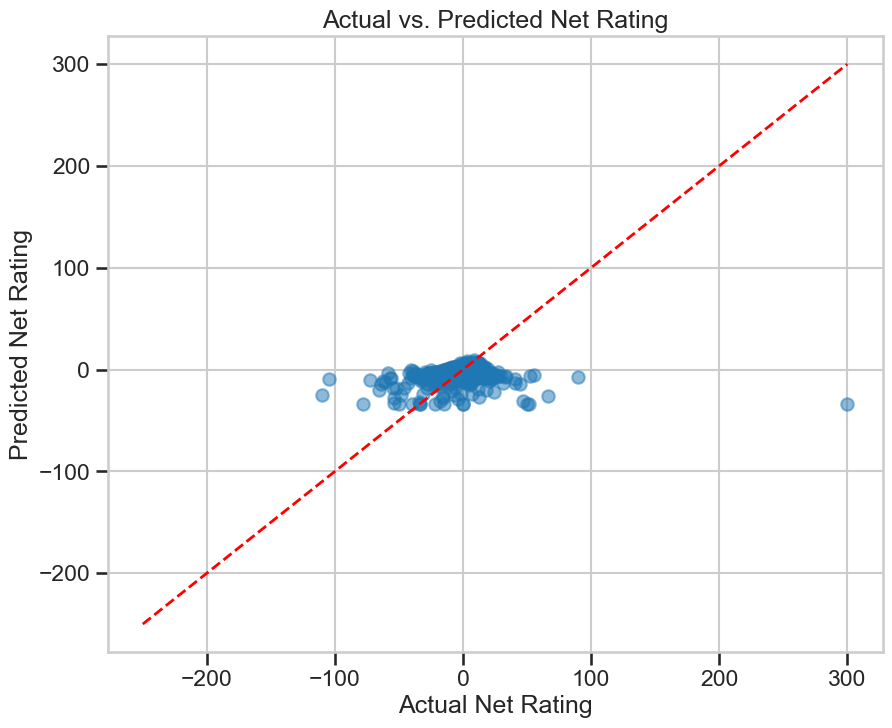

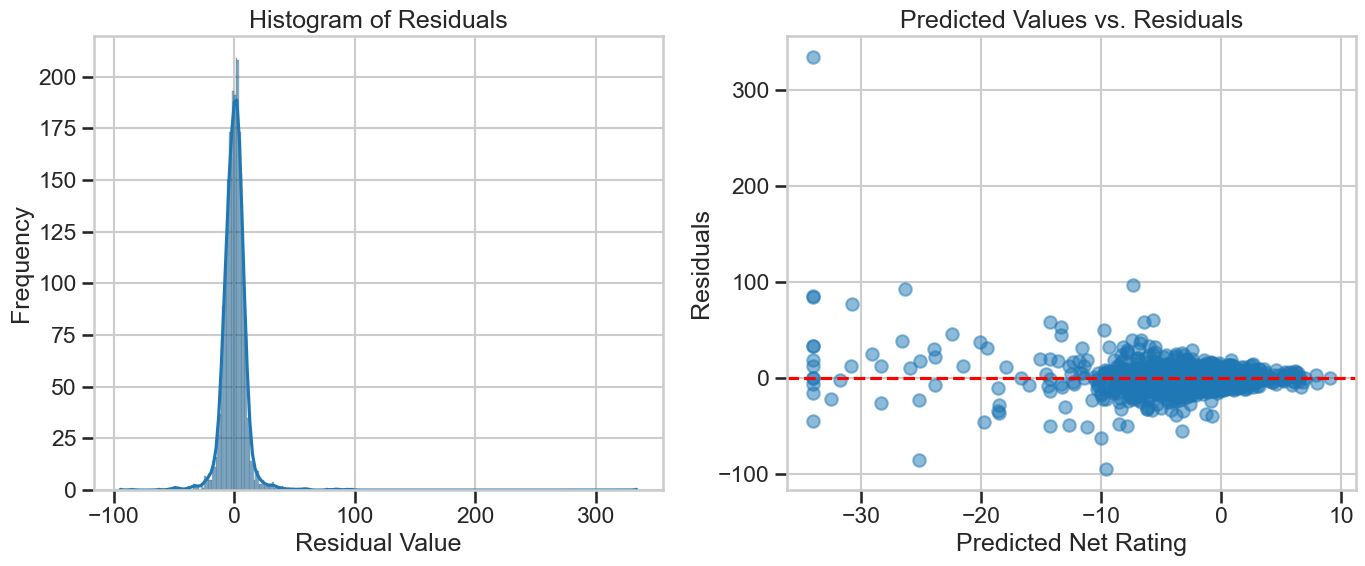

In [34]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared (R2):', metrics.r2_score(y_test, y_pred))

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual Net Rating')
plt.ylabel('Predicted Net Rating')
plt.title('Actual vs. Predicted Net Rating')
plt.show()
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted Values vs. Residuals')
plt.xlabel('Predicted Net Rating')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Notice that our numbers suggest the basic box score statistics of points, rebounds, and assists serve as very poor predictors for net rating. The MAE, MSE, and R-squared all give us the same conclusion, that there is both a lot of error in predctions as well as just inaccurate predicting. Regarding our residual graphs, we notice that the model does pretty well in predicting players with an average net rating of close to zero, meaning only for the most closely average players it shows some accuracy.

### Conclusion

Overall, if we look at the NBA as a whole, the most basic traditional box score statistics of points, rebounds, and assists do not predict net rating well at all. This suggests some positive outlook for advanced stats. They can tell us information that the traditional box score statistics cannot, meaning there is some insight into them. 

Additionally, upon conducting the residual analysis, we noted that the model did a lot better in predicting the net rating of players who had a net rating close to zero. This makes sense; players who are equally skilled on both ends of the court will end up with closer to a zero net rating, and at that point, raw traditional statistics can tell us a lot more about a player. When there isn't the nuance of, for example, aggressive defensive tendencies or offensive ball-hogging affecting a player's net rating, box score statistics tend to tell us more about the players.

Just as a caveat though, these players are not super common in modern basketball, as most players are known for a specific niche that they excel in, whether it's on-ball defense, catch-and-shoot threes, or offensive initation, just to name a few. We would have to do more dataset trimming and potentially looking at more intermediary statistics like field goal percentage to get a better feel of how traditional box score statistics and advanced statistics are related, as well as how much insight advanced statistics actually tell us.